   client_id  age  income  risk_score   location
0          1   63  124925        3.06  Vancouver
1          2   53   65311        3.37   Montreal
2          3   39  163355        1.19     Ottawa
3          4   67  244779        3.43  Vancouver
4          5   32  145305        1.68  Vancouver
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   client_id   20 non-null     int64  
 1   age         20 non-null     int64  
 2   income      20 non-null     int64  
 3   risk_score  20 non-null     float64
 4   location    20 non-null     object 
dtypes: float64(1), int64(3), object(1)
memory usage: 928.0+ bytes
None
       client_id        age        income  risk_score
count   20.00000  20.000000      20.00000   20.000000
mean    10.50000  47.850000  166920.35000    2.809000
std      5.91608  13.128013   49603.96113    1.256486
min      1.00000  26.000000  

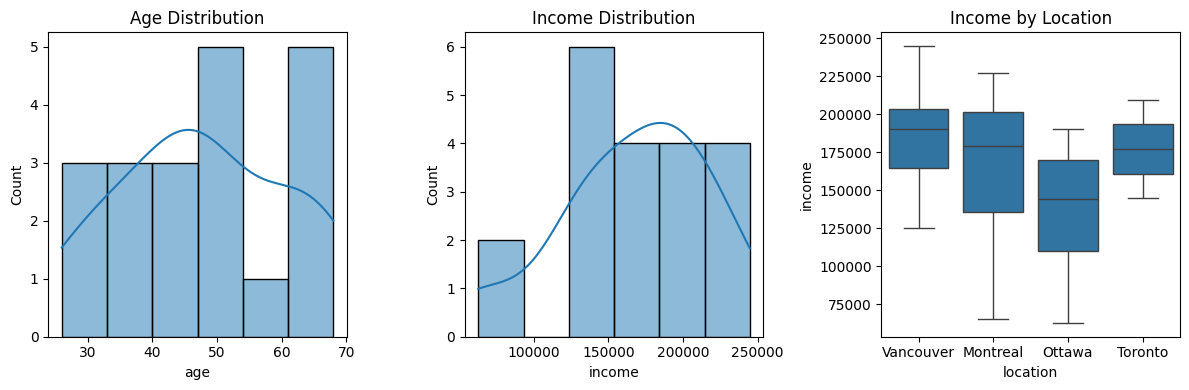

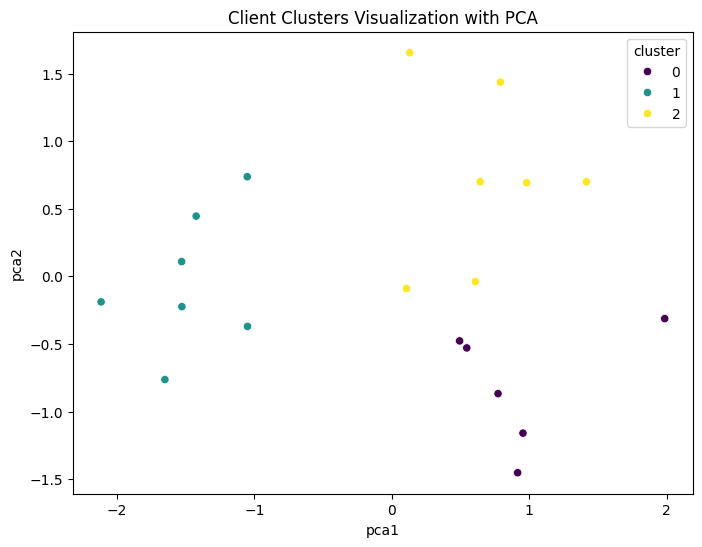

In [11]:
# client_segmentation.ipynb

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Load data
df = pd.read_csv('../data/clients.csv')

# Basic info
print(df.head())
print(df.info())
print(df.describe())

# Plot distributions
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
sns.histplot(df['age'], kde=True)
plt.title('Age Distribution')

plt.subplot(1, 3, 2)
sns.histplot(df['income'], kde=True)
plt.title('Income Distribution')

plt.subplot(1, 3, 3)
sns.boxplot(x='location', y='income', data=df)
plt.title('Income by Location')

plt.tight_layout()
plt.show()


# Feature engineering
risk_map = {'Low': 1, 'Medium': 2, 'High': 3}



# Select features for clustering
features = ['age', 'risk_score']
X = df[features]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

# PCA for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)
df['pca1'], df['pca2'] = pca_result[:, 0], pca_result[:, 1]

# Plot clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x='pca1', y='pca2', hue='cluster', data=df, palette='viridis')
plt.title('Client Clusters Visualization with PCA')
plt.show()

# Save results
df.to_csv('../data/client_segments.csv', index=False)


In [9]:
print(df.columns.tolist())

['client_id', 'age', 'income', 'risk_score', 'location']


In [5]:
print(df.columns)
print(df.head())



Index(['client_id', 'age', 'income', 'risk_score', 'location'], dtype='object')
   client_id  age  income  risk_score   location
0          1   63  124925        3.06  Vancouver
1          2   53   65311        3.37   Montreal
2          3   39  163355        1.19     Ottawa
3          4   67  244779        3.43  Vancouver
4          5   32  145305        1.68  Vancouver


In [12]:
df = pd.read_csv('../data/clients.csv')
print(df.columns)      # Check all column names
print(df.head())       # See first few rows

# Now check if 'risk_profile' exists:
if 'risk_profile' not in df.columns:
    print("Error: 'risk_profile' column not found in dataframe.")
else:
    # Your plotting code
    sns.boxplot(x='risk_profile', y='net_worth', data=df)



Index(['client_id', 'age', 'income', 'risk_score', 'location'], dtype='object')
   client_id  age  income  risk_score   location
0          1   63  124925        3.06  Vancouver
1          2   53   65311        3.37   Montreal
2          3   39  163355        1.19     Ottawa
3          4   67  244779        3.43  Vancouver
4          5   32  145305        1.68  Vancouver
Error: 'risk_profile' column not found in dataframe.


In [13]:
import pandas as pd

# Your dataframe columns and data sample confirmed

# Create risk categories based on risk_score
bins = [0, 1.5, 3, 5]  # define bin edges
labels = ['Low', 'Medium', 'High']  # category labels
df['risk_category'] = pd.cut(df['risk_score'], bins=bins, labels=labels)

# Now you can check if 'risk_category' exists
print(df[['risk_score', 'risk_category']].head())



   risk_score risk_category
0        3.06          High
1        3.37          High
2        1.19           Low
3        3.43          High
4        1.68        Medium


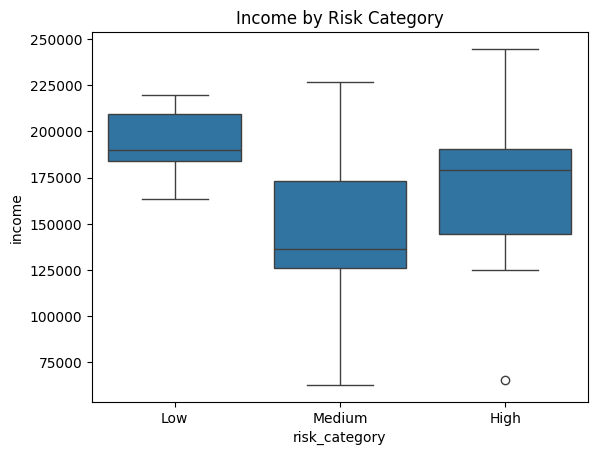

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='risk_category', y='income', data=df)
plt.title('Income by Risk Category')
plt.show()


In [15]:
df.isnull().sum()


client_id        0
age              0
income           0
risk_score       0
location         0
risk_category    0
dtype: int64

In [16]:
df.duplicated().sum()
df = df.drop_duplicates()


In [17]:
def remove_outliers(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[col] >= lower) & (df[col] <= upper)]

df = remove_outliers('income')
df = remove_outliers('age')
df = remove_outliers('risk_score')


In [18]:
df.to_csv('cleaned_clients.csv', index=False)


In [19]:
de = pd.read_csv('../data/transactions.csv')

In [20]:
print(de.head())
print(de.info())
print(de.describe())

   client_id transaction_type    amount        date
0         13         Dividend  15454.37  2025-04-30
1         13             Sell  16475.55  2025-01-15
2         14              Buy   1342.31  2025-02-13
3          8              Buy   4966.16  2025-01-16
4          6             Sell   2062.04  2025-02-19
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         60 non-null     int64  
 1   transaction_type  60 non-null     object 
 2   amount            60 non-null     float64
 3   date              60 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 2.0+ KB
None
       client_id        amount
count  60.000000     60.000000
mean   10.500000   9475.288333
std     5.457074   5058.289870
min     1.000000   1342.310000
25%     6.000000   5413.152500
50%    10.000000   8738.440000
75%    15.000000  13

In [21]:
missing = de.isnull().sum()
print("Missing values:\n", missing)


Missing values:
 client_id           0
transaction_type    0
amount              0
date                0
dtype: int64


In [22]:
de.drop_duplicates(inplace=True)


In [23]:
# Step 3: Convert data types
de['date'] = pd.to_datetime(de['date'], errors='coerce')
de['amount'] = pd.to_numeric(de['amount'], errors='coerce')

In [24]:
de['transaction_type'] = de['transaction_type'].str.strip().str.title()


In [25]:
q1 = de['amount'].quantile(0.25)
q3 = de['amount'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

de = de[
    (de['amount'] >= lower_bound) & 
    (de['amount'] <= upper_bound)
]

In [26]:
print(de.info())
print(de.describe())
print(de.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   client_id         60 non-null     int64         
 1   transaction_type  60 non-null     object        
 2   amount            60 non-null     float64       
 3   date              60 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 2.0+ KB
None
       client_id        amount                 date
count  60.000000     60.000000                   60
mean   10.500000   9475.288333  2024-11-24 02:24:00
min     1.000000   1342.310000  2024-05-18 00:00:00
25%     6.000000   5413.152500  2024-08-27 18:00:00
50%    10.000000   8738.440000  2024-12-09 00:00:00
75%    15.000000  13403.235000  2025-02-11 12:00:00
max    20.000000  18603.300000  2025-05-12 00:00:00
std     5.457074   5058.289870                  NaN
   client_id transac

In [27]:
transactions = de


In [ ]:
#Analyze Client Transactions

In [ ]:
#Total Transactions per Client

In [28]:
tx_counts = transactions.groupby('client_id').size().reset_index(name='transaction_count')


In [29]:
print(tx_counts)

    client_id  transaction_count
0           1                  3
1           2                  2
2           3                  2
3           4                  2
4           5                  5
5           6                  4
6           7                  3
7           8                  3
8           9                  1
9          10                  6
10         12                  2
11         13                  7
12         14                  4
13         15                  3
14         16                  3
15         17                  3
16         18                  4
17         19                  1
18         20                  2


In [30]:
client_totals = transactions.groupby('client_id')['amount'].sum().reset_index(name='total_amount')


In [ ]:
#Total amount spent or deposited

In [31]:
print(client_totals)

    client_id  total_amount
0           1      38563.28
1           2      20809.67
2           3      36344.33
3           4      24953.95
4           5      44596.15
5           6      20911.90
6           7      38685.37
7           8      11372.08
8           9       7005.24
9          10      68807.23
10         12      22077.29
11         13      69822.63
12         14      32668.16
13         15      31742.27
14         16      20992.94
15         17      23765.29
16         18      30521.75
17         19       9932.85
18         20      14944.92


In [ ]:
#Average Transaction Value

In [32]:
avg_tx = transactions.groupby('client_id')['amount'].mean().reset_index(name='avg_transaction')


In [33]:
print(avg_tx)

    client_id  avg_transaction
0           1     12854.426667
1           2     10404.835000
2           3     18172.165000
3           4     12476.975000
4           5      8919.230000
5           6      5227.975000
6           7     12895.123333
7           8      3790.693333
8           9      7005.240000
9          10     11467.871667
10         12     11038.645000
11         13      9974.661429
12         14      8167.040000
13         15     10580.756667
14         16      6997.646667
15         17      7921.763333
16         18      7630.437500
17         19      9932.850000
18         20      7472.460000


In [34]:
buy_total = transactions[transactions['transaction_type'] == 'Buy'].groupby('client_id')['amount'].sum().reset_index(name='total_buy')
sell_total = transactions[transactions['transaction_type'] == 'Sell'].groupby('client_id')['amount'].sum().reset_index(name='total_sell')
dividend_total = transactions[transactions['transaction_type'] == 'Dividend'].groupby('client_id')['amount'].sum().reset_index(name='total_dividends')


In [35]:
avg_tx = transactions.groupby('client_id')['amount'].mean().reset_index(name='avg_transaction')


In [36]:
print(transactions['transaction_type'].unique())


['Dividend' 'Sell' 'Buy']


In [37]:
print(avg_tx)


    client_id  avg_transaction
0           1     12854.426667
1           2     10404.835000
2           3     18172.165000
3           4     12476.975000
4           5      8919.230000
5           6      5227.975000
6           7     12895.123333
7           8      3790.693333
8           9      7005.240000
9          10     11467.871667
10         12     11038.645000
11         13      9974.661429
12         14      8167.040000
13         15     10580.756667
14         16      6997.646667
15         17      7921.763333
16         18      7630.437500
17         19      9932.850000
18         20      7472.460000


In [38]:
last_tx = transactions.groupby('client_id')['date'].max().reset_index(name='last_transaction_date')


In [39]:
print(last_tx)

    client_id last_transaction_date
0           1            2024-12-24
1           2            2024-12-07
2           3            2025-01-08
3           4            2025-03-19
4           5            2025-02-02
5           6            2025-03-20
6           7            2025-01-07
7           8            2025-02-17
8           9            2024-11-19
9          10            2025-03-30
10         12            2025-02-22
11         13            2025-05-12
12         14            2025-02-13
13         15            2025-04-14
14         16            2025-01-02
15         17            2024-11-29
16         18            2025-03-25
17         19            2025-04-06
18         20            2025-01-17


In [40]:
tx_type_dist = transactions.groupby(['client_id', 'transaction_type']).size().unstack(fill_value=0)


In [41]:
print(tx_type_dist)

transaction_type  Buy  Dividend  Sell
client_id                            
1                   1         1     1
2                   2         0     0
3                   1         1     0
4                   1         1     0
5                   1         1     3
6                   2         0     2
7                   0         2     1
8                   2         0     1
9                   0         1     0
10                  2         2     2
12                  0         0     2
13                  1         3     3
14                  4         0     0
15                  1         1     1
16                  0         3     0
17                  3         0     0
18                  2         1     1
19                  0         1     0
20                  1         0     1


In [42]:
activity_df = df.merge(tx_counts, on='client_id', how='left') \
                .merge(client_totals, on='client_id', how='left') \
                .merge(avg_tx, on='client_id', how='left') \
                .merge(last_tx, on='client_id', how='left') \
                .merge(tx_type_dist, on='client_id', how='left')


In [43]:
print(activity_df)

    client_id  age  income  risk_score   location risk_category  \
0           1   63  124925        3.06  Vancouver          High   
1           2   53   65311        3.37   Montreal          High   
2           3   39  163355        1.19     Ottawa           Low   
3           4   67  244779        3.43  Vancouver          High   
4           5   32  145305        1.68  Vancouver        Medium   
5           6   45  219765        1.26   Montreal           Low   
6           7   63  190608        4.80  Vancouver          High   
7           8   43  216730        4.86  Vancouver          High   
8           9   47  144478        4.23   Montreal          High   
9          10   35  182537        2.22   Montreal        Medium   
10         11   35  209503        1.39    Toronto           Low   
11         12   48  190523        3.74     Ottawa          High   
12         13   60   62747        2.76     Ottawa        Medium   
13         14   64  183855        1.49  Vancouver           Lo

In [44]:
import pandas as pd
from datetime import datetime, timedelta

# Define cutoff 
cutoff_date = pd.to_datetime("today") - timedelta(days=180)
activity_df['inactive'] = activity_df['last_transaction_date'] < cutoff_date


In [45]:
print(cutoff_date)

2024-11-20 15:21:23.238268


In [46]:
print(activity_df)

    client_id  age  income  risk_score   location risk_category  \
0           1   63  124925        3.06  Vancouver          High   
1           2   53   65311        3.37   Montreal          High   
2           3   39  163355        1.19     Ottawa           Low   
3           4   67  244779        3.43  Vancouver          High   
4           5   32  145305        1.68  Vancouver        Medium   
5           6   45  219765        1.26   Montreal           Low   
6           7   63  190608        4.80  Vancouver          High   
7           8   43  216730        4.86  Vancouver          High   
8           9   47  144478        4.23   Montreal          High   
9          10   35  182537        2.22   Montreal        Medium   
10         11   35  209503        1.39    Toronto           Low   
11         12   48  190523        3.74     Ottawa          High   
12         13   60   62747        2.76     Ottawa        Medium   
13         14   64  183855        1.49  Vancouver           Lo

In [47]:
def map_transaction_type(tx_type):
    tx_type = tx_type.lower()
    if tx_type == 'buy':
        return 'withdrawal'
    elif tx_type in ['sell', 'dividend']:
        return 'deposit'
    else:
        return 'other' 

In [48]:
transactions['type'] = transactions['transaction_type'].apply(map_transaction_type)


In [49]:
deposit_total = transactions[transactions['type'] == 'deposit'].groupby('client_id')['amount'].sum().reset_index(name='total_deposits')
withdrawal_total = transactions[transactions['type'] == 'withdrawal'].groupby('client_id')['amount'].sum().reset_index(name='total_withdrawals')

In [50]:
cash_flow = pd.merge(deposit_total, withdrawal_total, on='client_id', how='outer').fillna(0)


In [51]:
print(cash_flow)

    client_id  total_deposits  total_withdrawals
0           1        29099.89            9463.39
1           2            0.00           20809.67
2           3        18436.25           17908.08
3           4        14278.52           10675.43
4           5        33109.29           11486.86
5           6        12151.69            8760.21
6           7        38685.37               0.00
7           8         2765.85            8606.23
8           9         7005.24               0.00
9          10        45214.28           23592.95
10         12        22077.29               0.00
11         13        65292.71            4529.92
12         14            0.00           32668.16
13         15        23314.32            8427.95
14         16        20992.94               0.00
15         17            0.00           23765.29
16         18        19042.38           11479.37
17         19         9932.85               0.00
18         20         2230.23           12714.69


In [52]:
cash_flow['net_cash_flow'] = cash_flow['total_deposits'] - cash_flow['total_withdrawals']


In [53]:
print(cash_flow)

    client_id  total_deposits  total_withdrawals  net_cash_flow
0           1        29099.89            9463.39       19636.50
1           2            0.00           20809.67      -20809.67
2           3        18436.25           17908.08         528.17
3           4        14278.52           10675.43        3603.09
4           5        33109.29           11486.86       21622.43
5           6        12151.69            8760.21        3391.48
6           7        38685.37               0.00       38685.37
7           8         2765.85            8606.23       -5840.38
8           9         7005.24               0.00        7005.24
9          10        45214.28           23592.95       21621.33
10         12        22077.29               0.00       22077.29
11         13        65292.71            4529.92       60762.79
12         14            0.00           32668.16      -32668.16
13         15        23314.32            8427.95       14886.37
14         16        20992.94           

In [54]:
high_potential_clients = cash_flow[cash_flow['net_cash_flow'] > 0].sort_values(by='net_cash_flow', ascending=False)


In [55]:
print(high_potential_clients)

    client_id  total_deposits  total_withdrawals  net_cash_flow
11         13        65292.71            4529.92       60762.79
6           7        38685.37               0.00       38685.37
10         12        22077.29               0.00       22077.29
4           5        33109.29           11486.86       21622.43
9          10        45214.28           23592.95       21621.33
14         16        20992.94               0.00       20992.94
0           1        29099.89            9463.39       19636.50
13         15        23314.32            8427.95       14886.37
17         19         9932.85               0.00        9932.85
16         18        19042.38           11479.37        7563.01
8           9         7005.24               0.00        7005.24
3           4        14278.52           10675.43        3603.09
5           6        12151.69            8760.21        3391.48
2           3        18436.25           17908.08         528.17


In [56]:
high_potential_clients = high_potential_clients.reset_index(drop=True)
print(high_potential_clients)


    client_id  total_deposits  total_withdrawals  net_cash_flow
0          13        65292.71            4529.92       60762.79
1           7        38685.37               0.00       38685.37
2          12        22077.29               0.00       22077.29
3           5        33109.29           11486.86       21622.43
4          10        45214.28           23592.95       21621.33
5          16        20992.94               0.00       20992.94
6           1        29099.89            9463.39       19636.50
7          15        23314.32            8427.95       14886.37
8          19         9932.85               0.00        9932.85
9          18        19042.38           11479.37        7563.01
10          9         7005.24               0.00        7005.24
11          4        14278.52           10675.43        3603.09
12          6        12151.69            8760.21        3391.48
13          3        18436.25           17908.08         528.17


In [ ]:
import os
os.getcwd()


In [57]:
df = pd.read_csv("../data/transactions.csv")


In [58]:
import os

# Check current working directory
print("Current working directory:", os.getcwd())

# List all files one level up in the project root
print("\nFiles in parent directory (../):")
print(os.listdir("../"))

# List files in data folder one level up
print("\nFiles in ../data/:")
print(os.listdir("../data/"))


Current working directory: C:\Users\patel\OneDrive\Desktop\Dashboard_portfolio\notebooks

Files in parent directory (../):
['.github', '.ipynb_checkpoints', 'app', 'dashboards', 'data', 'data_quality_checke', 'Dockerfile', 'notebooks', 'portfolio_optimizer', 'README.md']

Files in ../data/:
['.ipynb_checkpoints', 'clients.csv', 'client_segments.csv', 'portfolios.csv', 'price_data.csv', 'transactions.csv']


In [60]:
from pathlib import Path
import pandas as pd

# Base project directory
base_dir = Path.cwd().parent

# Data path
data_path = base_dir / "data" / "transactions.csv"

# Load CSV
df = pd.read_csv(data_path)


In [61]:
print(activity_df)

    client_id  age  income  risk_score   location risk_category  \
0           1   63  124925        3.06  Vancouver          High   
1           2   53   65311        3.37   Montreal          High   
2           3   39  163355        1.19     Ottawa           Low   
3           4   67  244779        3.43  Vancouver          High   
4           5   32  145305        1.68  Vancouver        Medium   
5           6   45  219765        1.26   Montreal           Low   
6           7   63  190608        4.80  Vancouver          High   
7           8   43  216730        4.86  Vancouver          High   
8           9   47  144478        4.23   Montreal          High   
9          10   35  182537        2.22   Montreal        Medium   
10         11   35  209503        1.39    Toronto           Low   
11         12   48  190523        3.74     Ottawa          High   
12         13   60   62747        2.76     Ottawa        Medium   
13         14   64  183855        1.49  Vancouver           Lo

In [62]:
print(activity_df)

    client_id  age  income  risk_score   location risk_category  \
0           1   63  124925        3.06  Vancouver          High   
1           2   53   65311        3.37   Montreal          High   
2           3   39  163355        1.19     Ottawa           Low   
3           4   67  244779        3.43  Vancouver          High   
4           5   32  145305        1.68  Vancouver        Medium   
5           6   45  219765        1.26   Montreal           Low   
6           7   63  190608        4.80  Vancouver          High   
7           8   43  216730        4.86  Vancouver          High   
8           9   47  144478        4.23   Montreal          High   
9          10   35  182537        2.22   Montreal        Medium   
10         11   35  209503        1.39    Toronto           Low   
11         12   48  190523        3.74     Ottawa          High   
12         13   60   62747        2.76     Ottawa        Medium   
13         14   64  183855        1.49  Vancouver           Lo

In [63]:
from sklearn.preprocessing import StandardScaler

features = ['age', 'income', 'risk_score', 'transaction_count', 'total_amount', 'avg_transaction']
activity_df_clean = activity_df.dropna(subset=features).copy()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(activity_df_clean[features])
